##  Exploratory Data Analysis For Supermarket Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive\\supermarket.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Find out the top 5 cities with respect to sales from the south region also need the visualization

In [31]:
south_region = data.groupby(["Region","City"])["Sales"].sum().reset_index()
south_region.loc[south_region["Region"] == "South"]

,Region,City,Sales
288,South,Alexandria,5519.570
289,South,Apopka,904.554
290,South,Arlington,14366.760
291,South,Asheville,1475.376
292,South,Athens,1434.720
...,...,...,...
407,South,Warner Robins,434.800
408,South,Waynesboro,3058.770
409,South,West Palm Beach,141.328
410,South,Wilmington,743.162


# What is the total Sales value?

In [5]:
data["Sales"].sum()

2261536.7827000003

# Which customer has generated the highest Sales?

In [6]:
each_customer_sales = data.groupby("Customer ID")["Sales"].sum().reset_index().sort_values("Sales", ascending = False)
each_customer_sales.iloc[0]

Customer ID    SM-20320
Sales          25043.05
Name: 700, dtype: object

# Which product category contributions the most to Sales?

In [7]:
data.groupby("Category")["Sales"].sum().reset_index().sort_values("Sales",ascending = False).iloc[0]

Category    Technology
Sales       827455.873
Name: 2, dtype: object

# What is the average order value?

In [8]:
data.groupby("Order ID")["Sales"].mean().reset_index()["Sales"].mean()

221.42693973330267

# Which order has the highest sales value?

In [9]:
data.groupby("Order ID")["Sales"].sum().reset_index().sort_values("Sales",ascending = False).iloc[0]

Order ID    CA-2015-145317
Sales            23661.228
Name: 533, dtype: object

# What is the most common ship mode?

In [10]:
data["Ship Mode"].mode()[0]

'Standard Class'

# How does the shipping duration vary across different ship modes?

In [16]:
data["Order Date"] = pd.to_datetime(data["Order Date"], dayfirst=True)

data["Order Date"]

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [43]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"], dayfirst=True)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_date,different_day_of_week,order_year,order_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,0,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,1,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,1,2016,10


In [44]:
data["Shipping Duration"] = (data["Ship Date"] - data["Order Date"]).astype("str").str.split(expand = True)[0]
data["Shipping Duration"]

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9800, dtype: object

In [45]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,order_date,different_day_of_week,order_year,order_month,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2,2017,11,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2,2017,11,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,0,2017,6,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,1,2016,10,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,1,2016,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05-21,6,2017,5,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-01-12,1,2016,1,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016-01-12,1,2016,1,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-01-12,1,2016,1,5


# What is the distribution of sales across different customers segments?

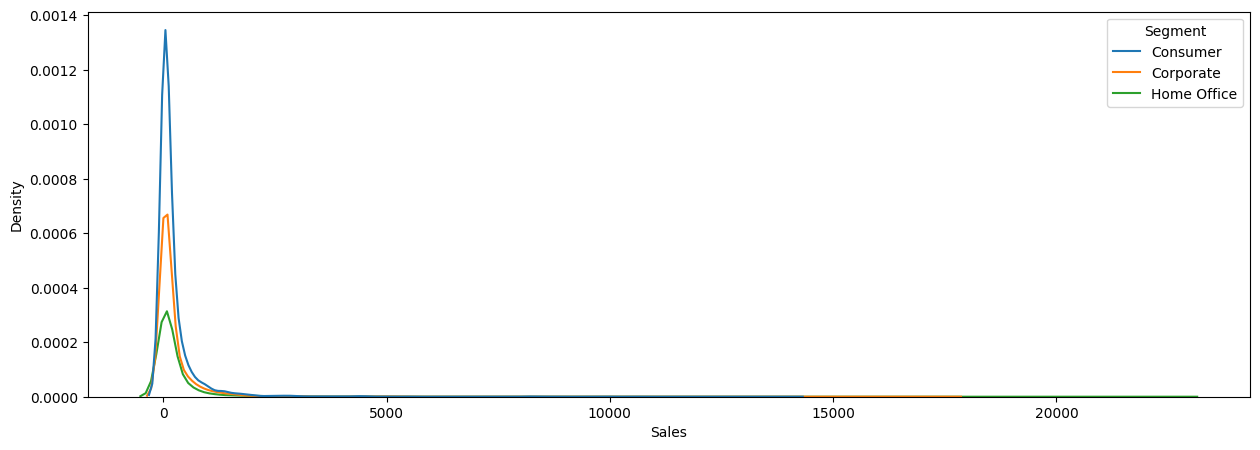

In [22]:
plt.figure(figsize = (15,5))
sns.kdeplot(data = data, x = "Sales", hue = "Segment")
plt.show()

# Which state has the most customers?

In [41]:
data.groupby("State")["Customer ID"].nunique().reset_index().sort_values("Customer ID",ascending = False).iloc[0]

State          California
Customer ID           570
Name: 3, dtype: object

# What is the most popular product sub-category?

In [23]:
data["Sub-Category"].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

# What is the distribution of sales across different states?

In [6]:
top_5_state = data.groupby("State")["Sales"].sum().reset_index().sort_values("Sales",ascending = False).head()["State"].tolist()
top_5_state

['California', 'New York', 'Texas', 'Washington', 'Pennsylvania']

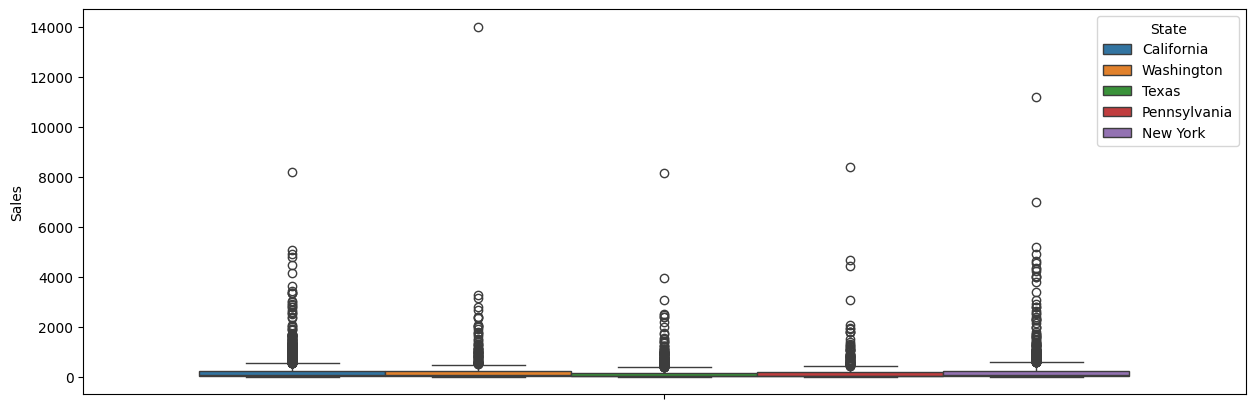

In [25]:
plt.figure(figsize = (15,5))
sns.boxplot(data = data.loc[data["State"].isin(top_5_state)], y = "Sales", hue = "State")
plt.show()

# How does the sales performance vary by region?

In [7]:
sales_performance = data.groupby("Region")["Sales"].mean().reset_index().sort_values("Sales",ascending = False)
sales_performance

,Region,Sales
2,South,243.524067
1,East,240.401697
3,West,226.184613
0,Central,216.357889


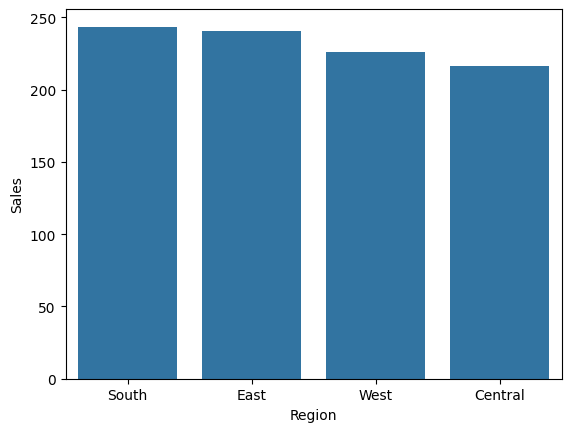

In [27]:
sns.barplot(data = sales_performance, x ="Region", y = "Sales")
plt.show()

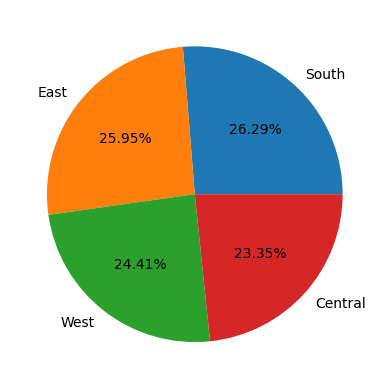

In [28]:
plt.pie(labels = sales_performance["Region"],x = sales_performance["Sales"], autopct = "%1.2f%%")
plt.show()

# How many unique customers are there?

In [29]:
data["Customer Name"].nunique()

793

# Is there a correlation between order month and sales value?

In [17]:
data["Order Date"] = pd.to_datetime(data["Order Date"], dayfirst=True)
data["Order Date"]

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [18]:
data["Order Date"].dt.year

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: Order Date, Length: 9800, dtype: int32

In [25]:
data["order_year"] = data["Order Date"].dt.year
data["order_year"]

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: order_year, Length: 9800, dtype: int32

In [33]:
data["order_month"] = data["Order Date"].dt.month
data["order_month"]

0       11
1       11
2        6
3       10
4       10
        ..
9795     5
9796     1
9797     1
9798     1
9799     1
Name: order_month, Length: 9800, dtype: int32

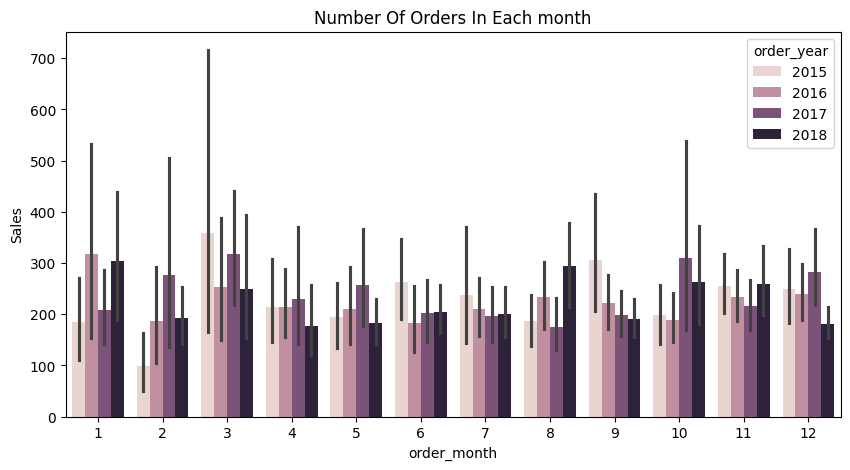

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(data = data , x= "order_month", y= "Sales", hue= "order_year")
plt.title("Number Of Orders In Each month")
plt.show()

# How do different product categories correlate with sales value?

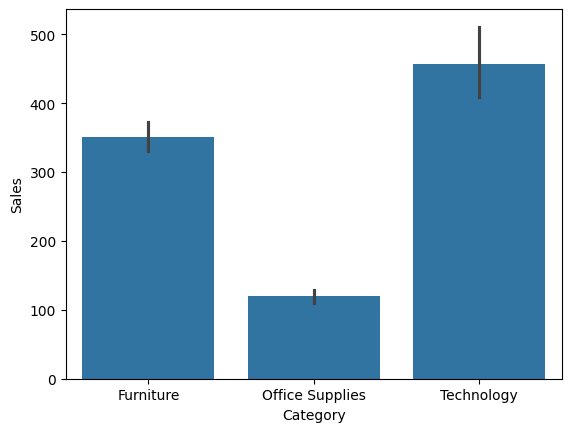

In [30]:
sns.barplot(data = data, x = "Category", y = "Sales")
plt.show()

# How do sales vary over different days of the week?

In [21]:
data["different_day_of_week"] = data["Order Date"].dt.weekday
data["different_day_of_week"]

0       2
1       2
2       0
3       1
4       1
       ..
9795    6
9796    1
9797    1
9798    1
9799    1
Name: different_day_of_week, Length: 9800, dtype: int32

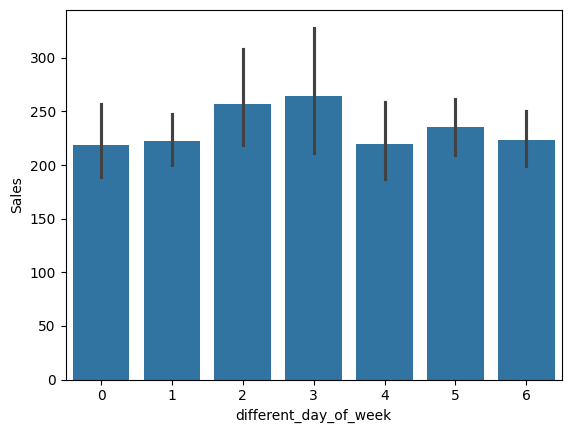

In [23]:
sns.barplot(data = data, x = "different_day_of_week" , y = "Sales")
plt.show()

# How many orders are placed in each month?

In [40]:
c = data.groupby(["order_year","order_month"])["Order ID"].nunique().reset_index()
c

,order_year,order_month,Order ID
0,2015,1,30
1,2015,2,28
2,2015,3,69
3,2015,4,63
4,2015,5,68
5,2015,6,64
6,2015,7,64
7,2015,8,70
8,2015,9,129
9,2015,10,78


# Which regions have the longest average shipping duration?

In [54]:
data["Order Date"] = pd.to_datetime(data["Order Date"], dayfirst=True)
data["Order Date"]

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [55]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"], dayfirst=True)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [56]:
data["Shipping Duration"] = (data["Ship Date"] - data["Order Date"]).astype("str").str.split(expand = True)[0]
data["Shipping Duration"]

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9800, dtype: object

In [58]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5


In [65]:
data["Shipping Duration"] = data["Shipping Duration"].astype("int")
data["Shipping Duration"]

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9800, dtype: int32

In [66]:
data.groupby("Region")["Shipping Duration"].mean().reset_index().sort_values("Shipping Duration",ascending = False).iloc[0]

Region                Central
Shipping Duration    4.065876
Name: 0, dtype: object

# How does the shipping duration vary across different ship modes?

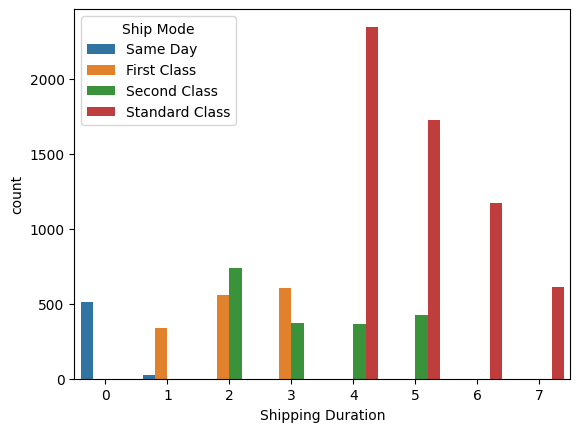

In [67]:
sns.countplot(data = data, x = "Shipping Duration", hue="Ship Mode")
plt.show()